In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [2]:
pylab.rcParams['figure.figsize'] = 16, 12
dpii=500;

In [3]:
filename='ATA_data.csv'

In [4]:
df = pd.read_csv(filename)
df =df.drop('Unnamed: 0',1)

In [5]:
df.shape

(1636773, 24)

#### Impressions to install bar plot with relation to the days in a week

In [6]:
df.groupby(['weekday', 'hours']).sum();

In [7]:
df_filter = df[['weekday', 'hours', 'app_type', 'os', 'country', 'impression', 'clicked', 'installed']]

In [8]:
grouped_w=df.groupby('weekday')['impression','installed'].sum()

In [9]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

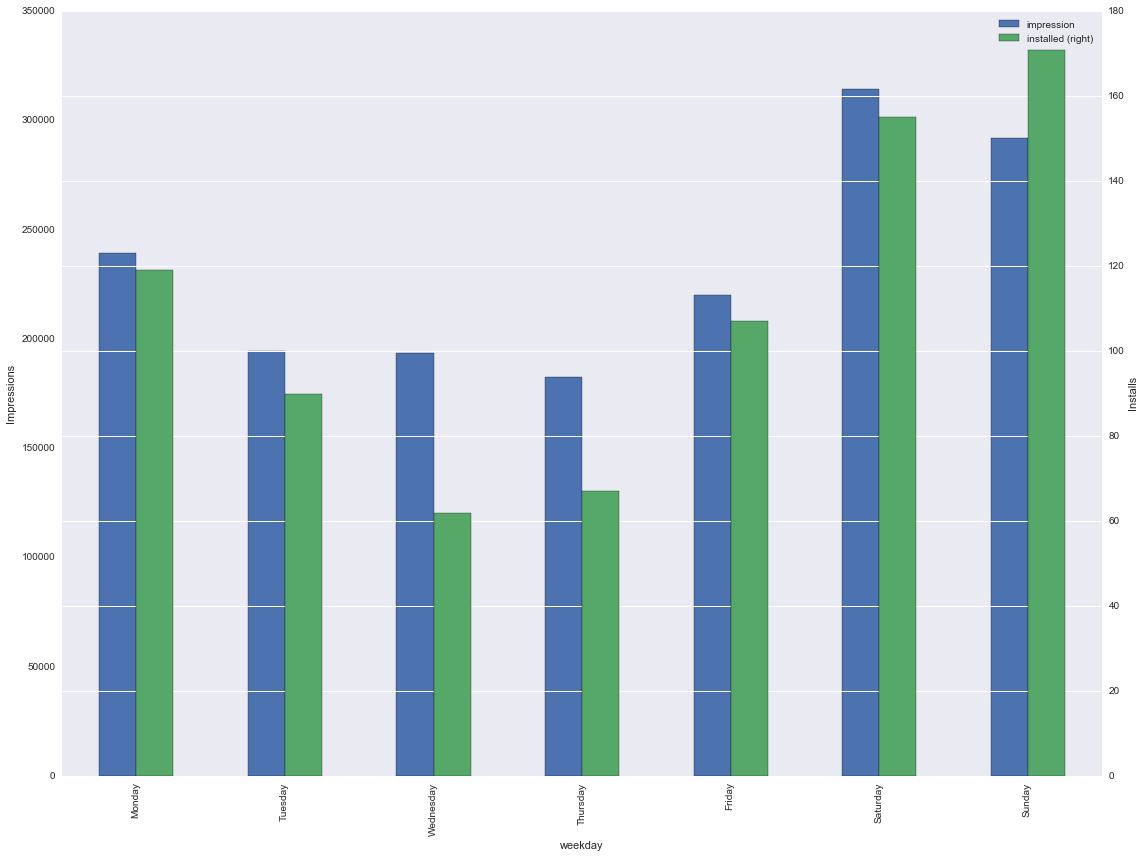

In [10]:
day_plot = grouped_w.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Installs_Daily.png', dpi=dpii)

In [11]:
grouped_wCI=df.groupby('weekday')['clicked','installed'].sum()

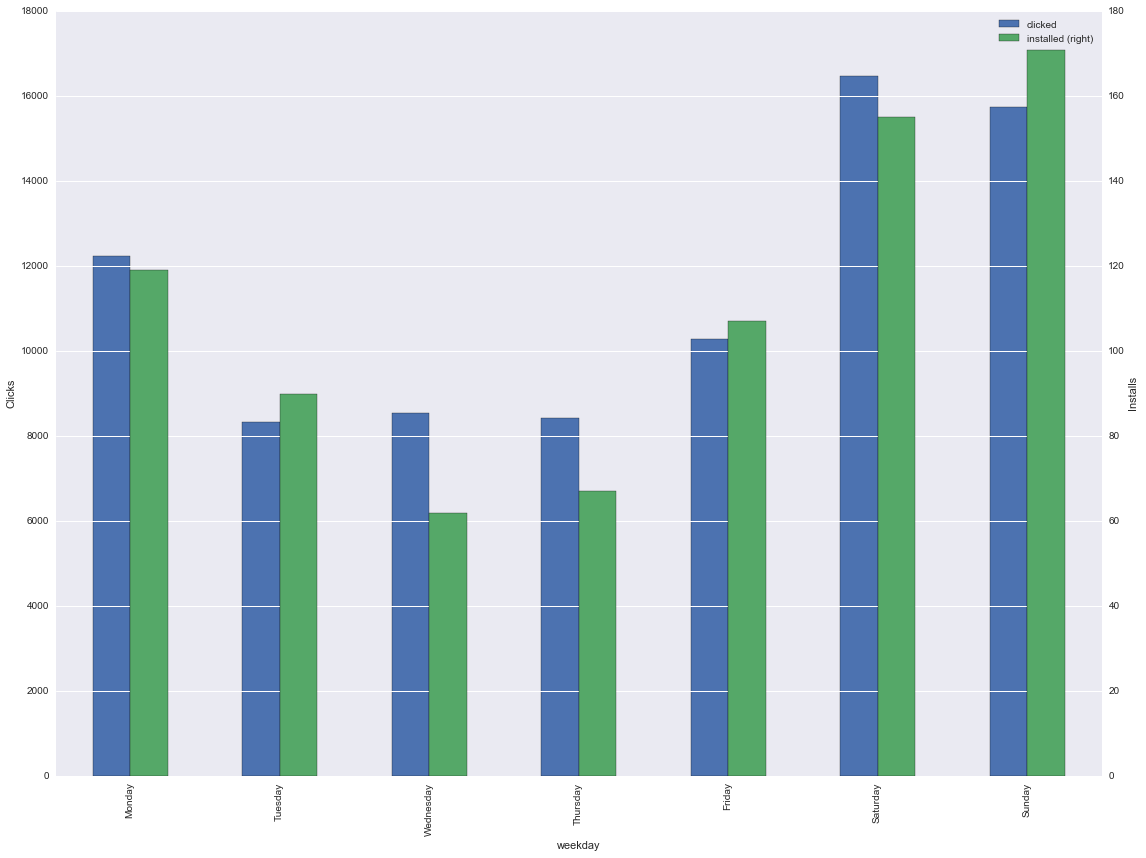

In [12]:
day_plot2 = grouped_wCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=dpii)

#### Install to impression bar plot comparison on a per hour basis

In [13]:
grouped_h=df.groupby('hours')['impression','installed'].sum()
grouped_hCI=df.groupby('hours')['clicked','installed'].sum()

In [14]:
grouped_h['ratio']=grouped_h['installed']/grouped_h['impression']*100

In [15]:
hr_range=map(str, range(1,11 + 1))

In [16]:
hours=['12 am'] + hr_range + ['12 pm'] + hr_range

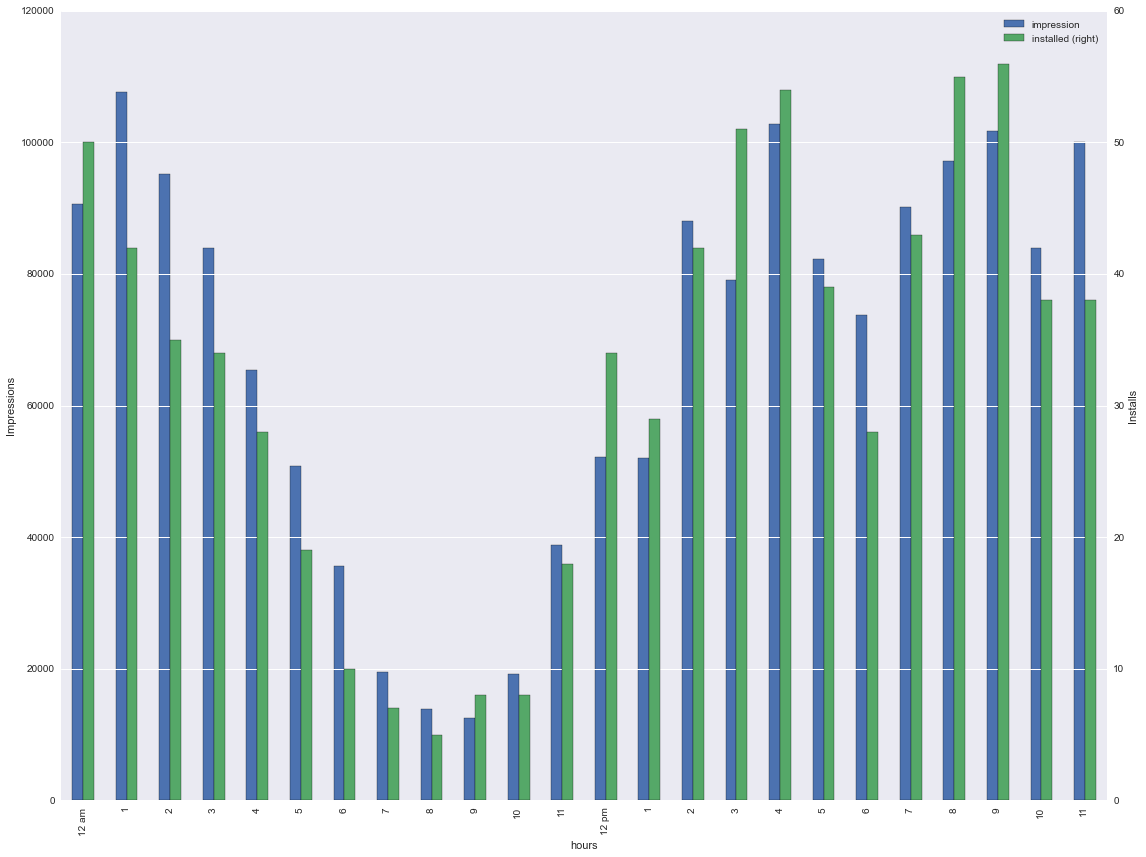

In [17]:
hr_plot = grouped_h.drop('ratio',1).plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_h.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impression_Installs_Hourly.png', dpi=dpii)

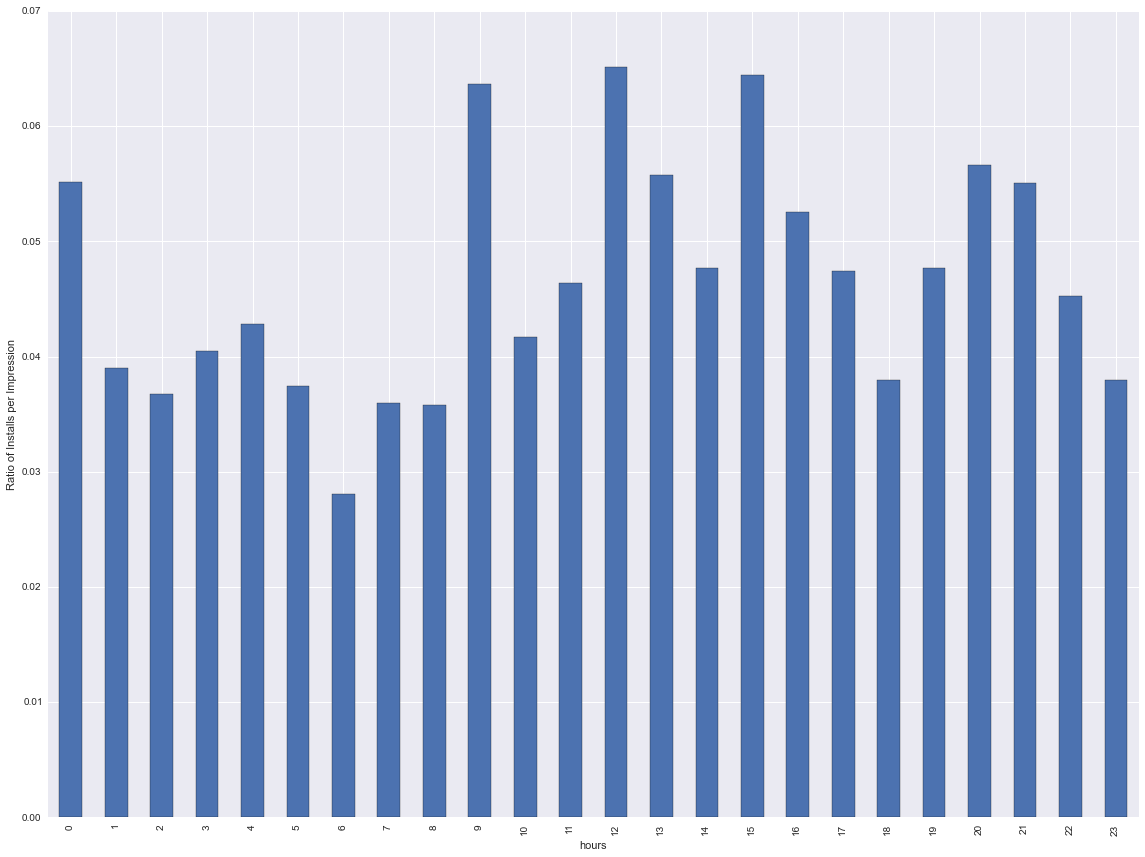

In [18]:
ratio_hr_plot = grouped_h['ratio'].plot(kind = 'bar')
ratio_hr_plot.set_ylabel('Ratio of Installs per Impression');
plt.tight_layout()
plt.savefig('Impressions_Installs_HourlyRatio.png', dpi=dpii)

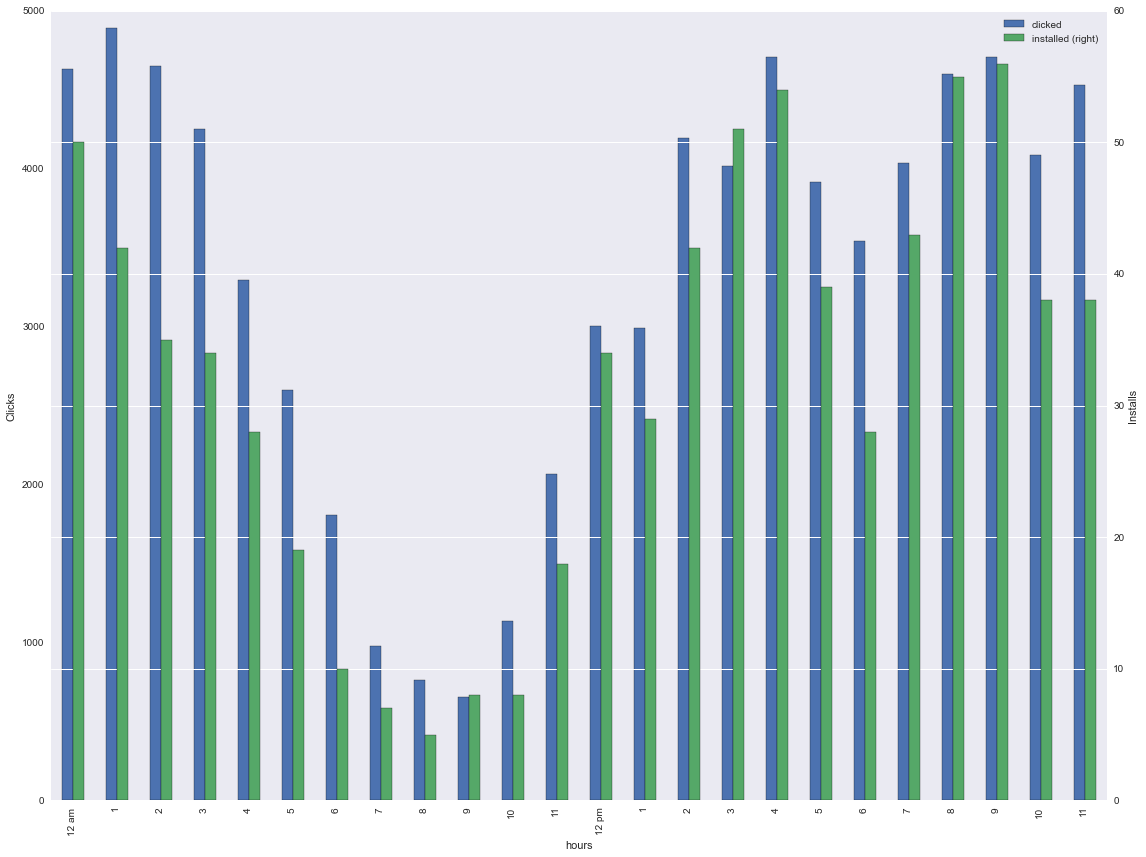

In [19]:
hr_plot2 = grouped_hCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_hCI.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Hourly.png', dpi=dpii)

In [20]:
grouped_wh_Ins=df.groupby(['weekday', 'hours'])[['installed']].sum()

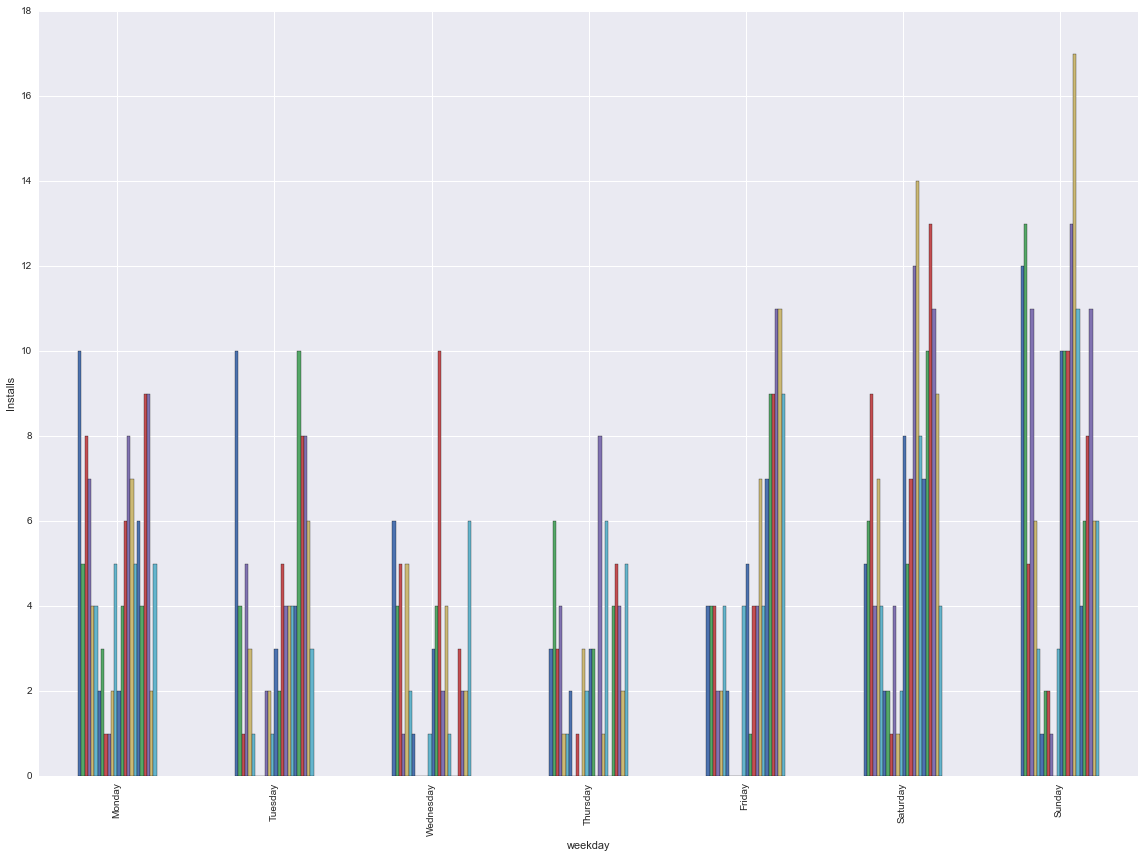

In [21]:
grouped_wh_Ins.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Ins.unstack().index-1, days, rotation='vertical');
plt.ylabel('Installs');
plt.tight_layout()
plt.savefig('Installs_Daily_Summary.png', dpi=dpii)

In [22]:
grouped_wh_Imp=df.groupby(['weekday', 'hours'])[['impression']].sum()

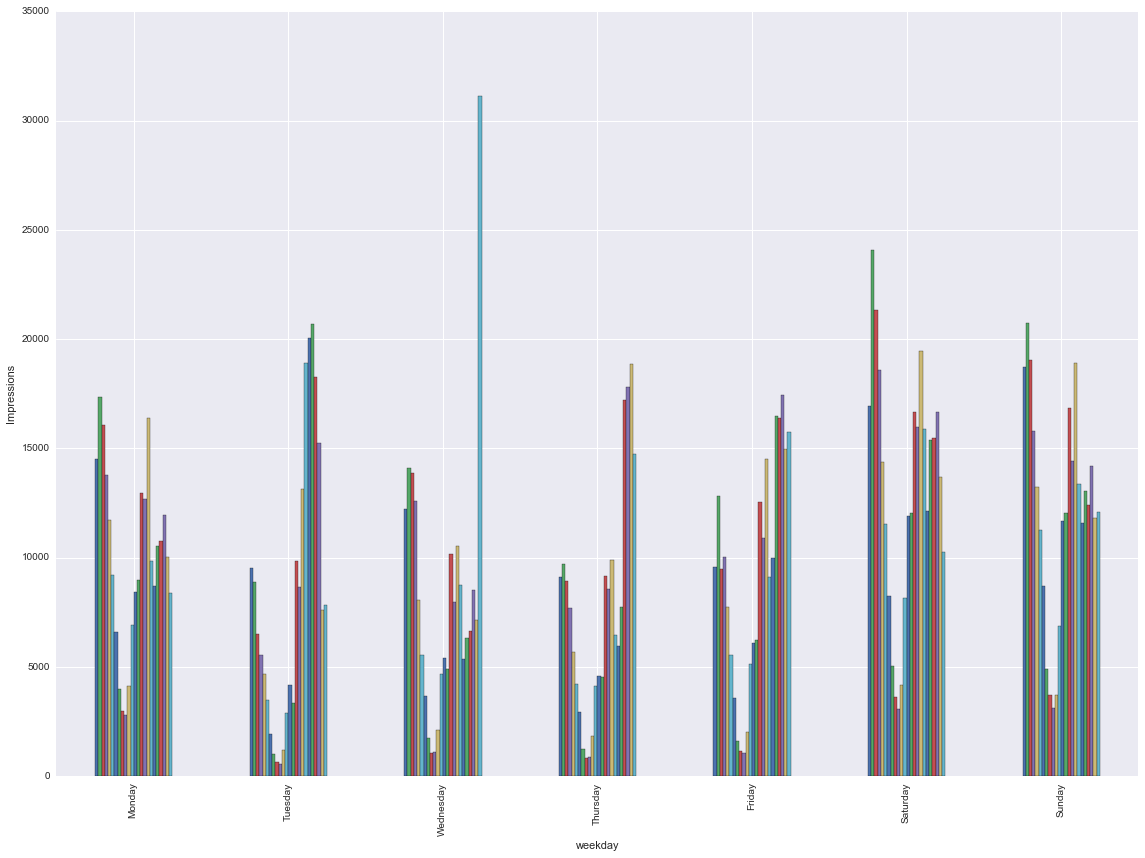

In [23]:
grouped_wh_Imp.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Imp.unstack().index-1, days, rotation='vertical');
plt.ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Daily_Summary.png', dpi=dpii)

In [24]:
grouped_wh_C=df.groupby(['weekday', 'hours'])[['clicked']].sum()

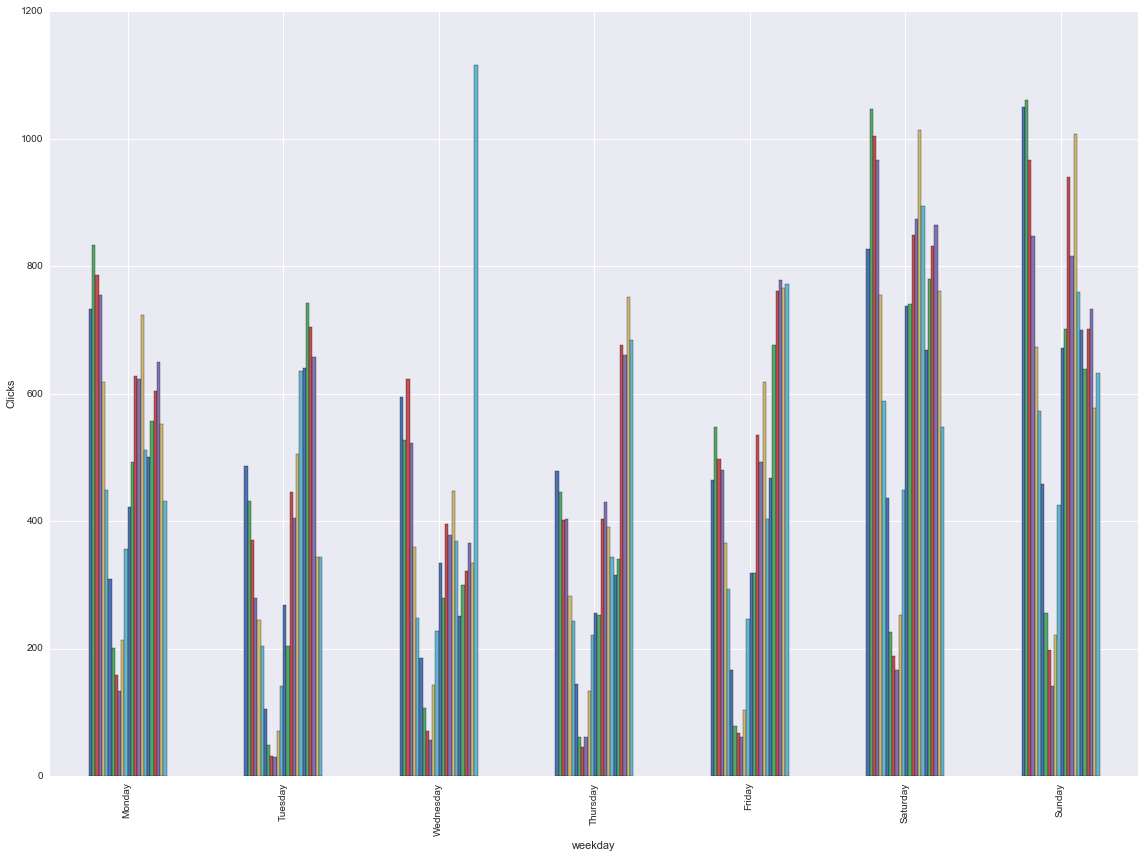

In [25]:
grouped_wh_C.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_C.unstack().index-1, days, rotation='vertical');
plt.ylabel('Clicks');
plt.tight_layout()
plt.savefig('Clicks_Daily_Summary.png', dpi=dpii)

In [26]:
cols_to_keep=['weekday','hours','impression','installed','clicked', 'app_type']
mini_df=df[cols_to_keep]

In [27]:
grouped_Imp_Ins_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'installed']].sum().reset_index()

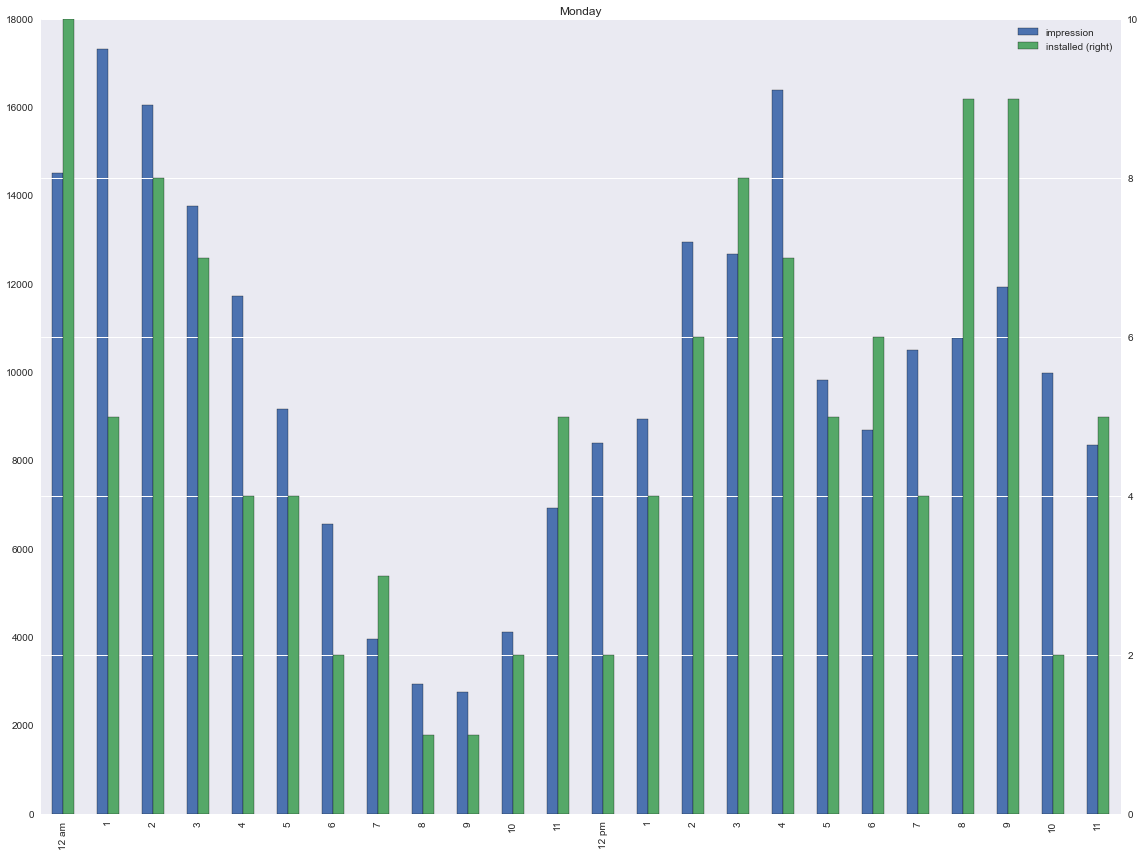

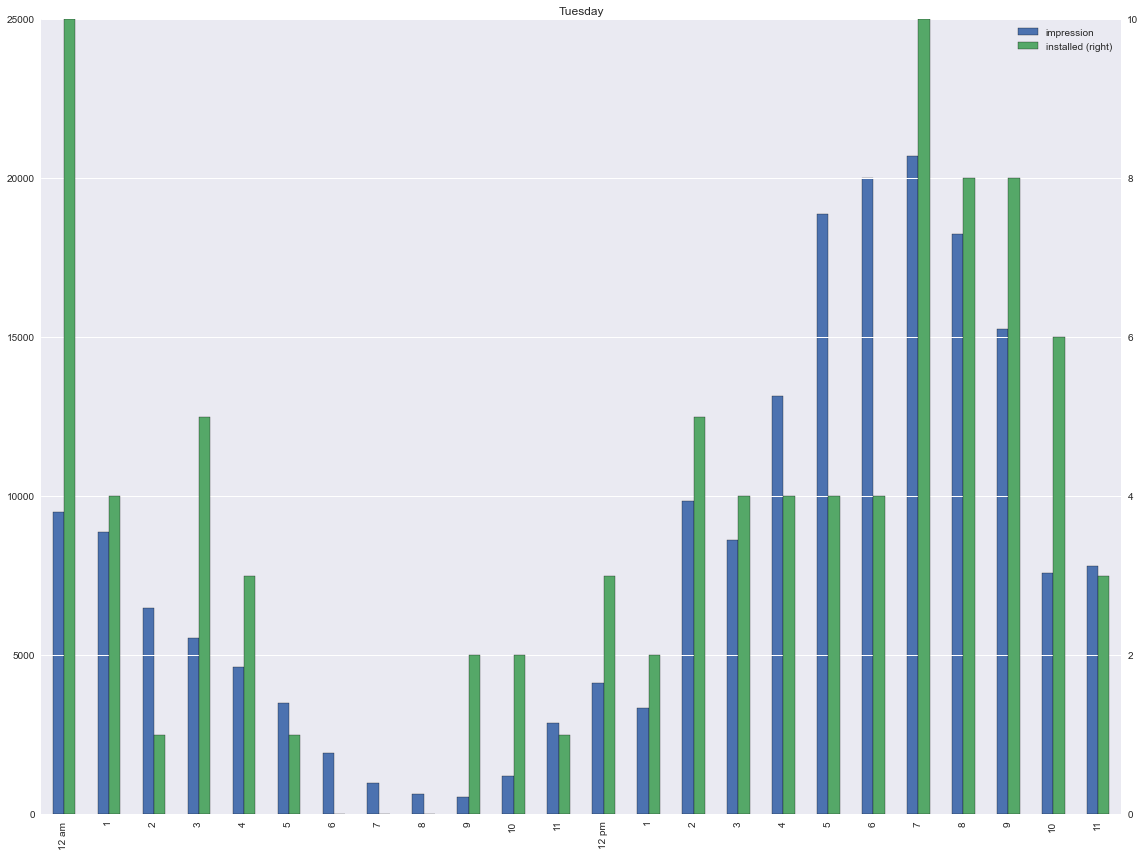

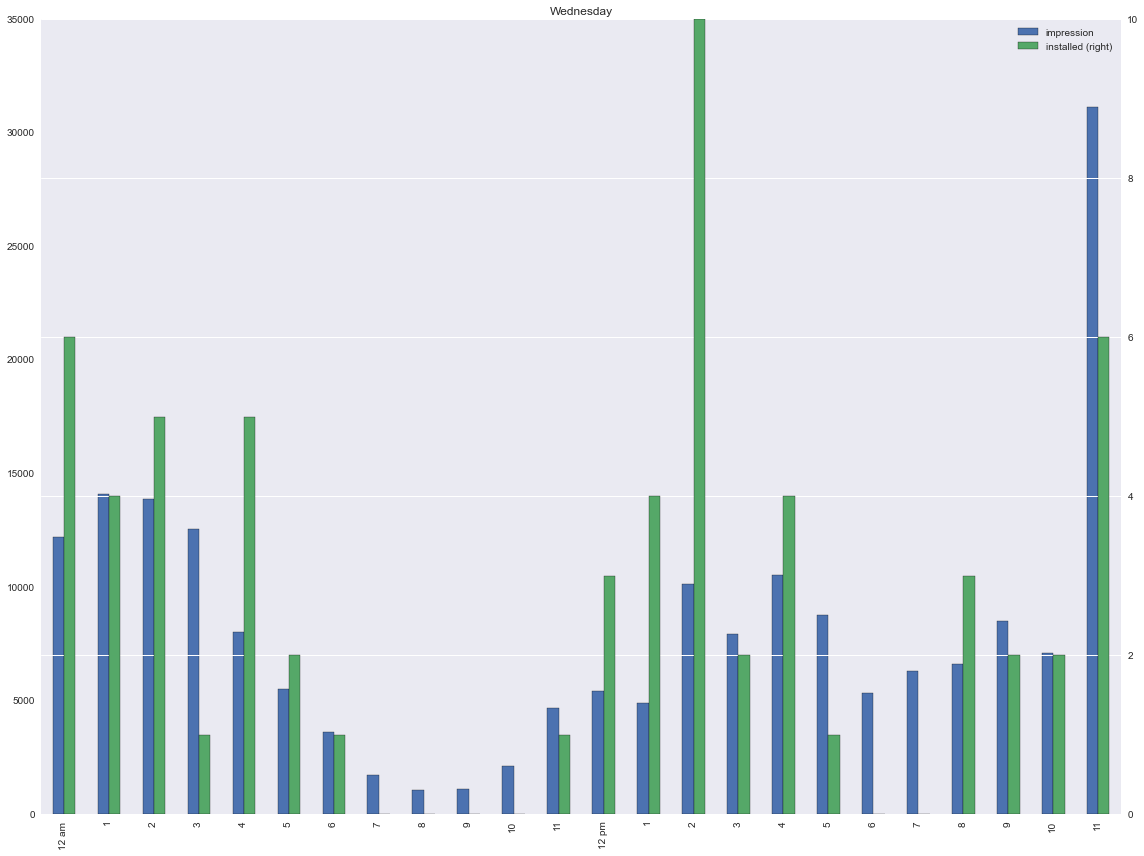

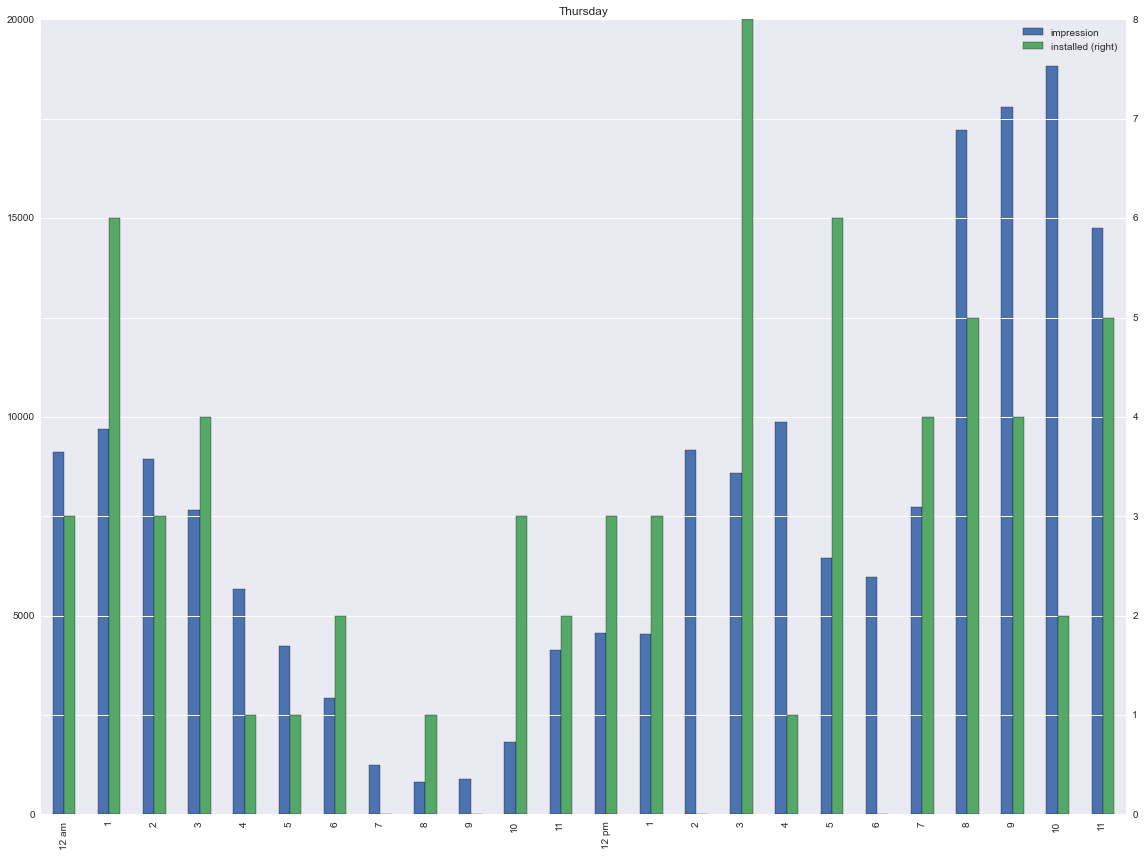

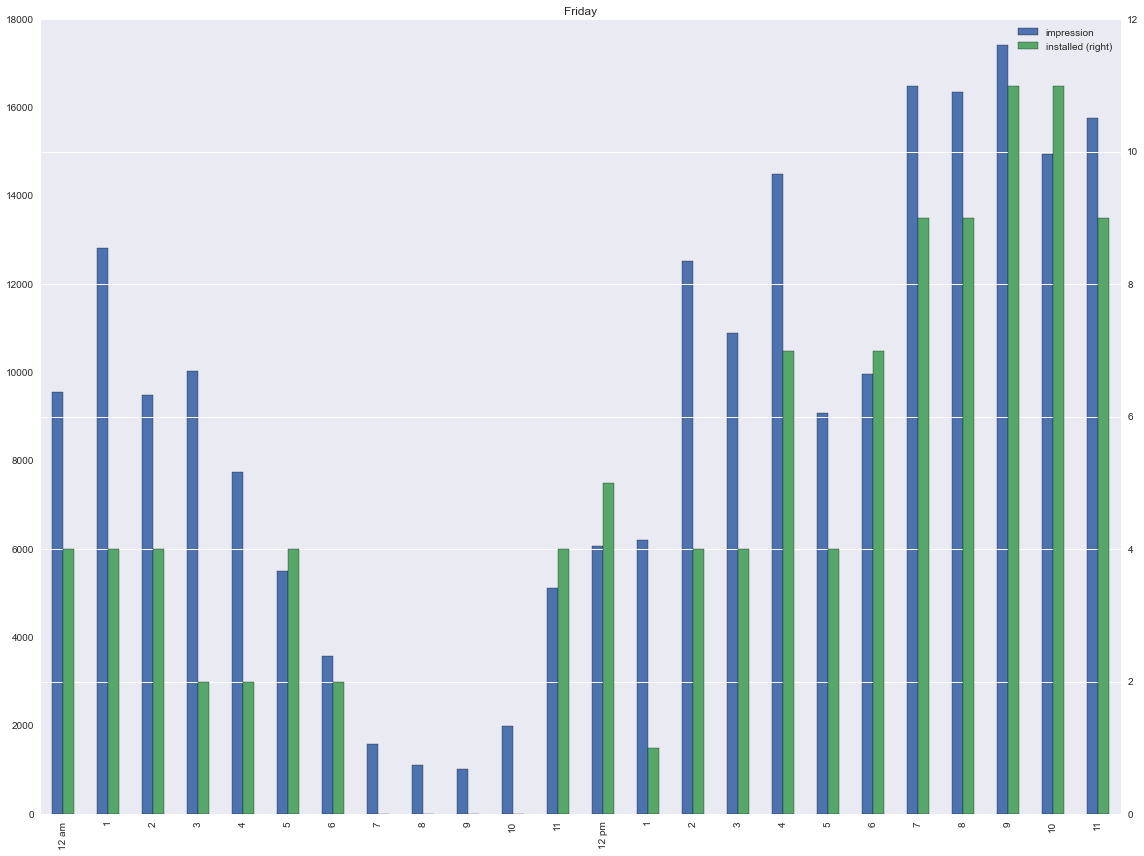

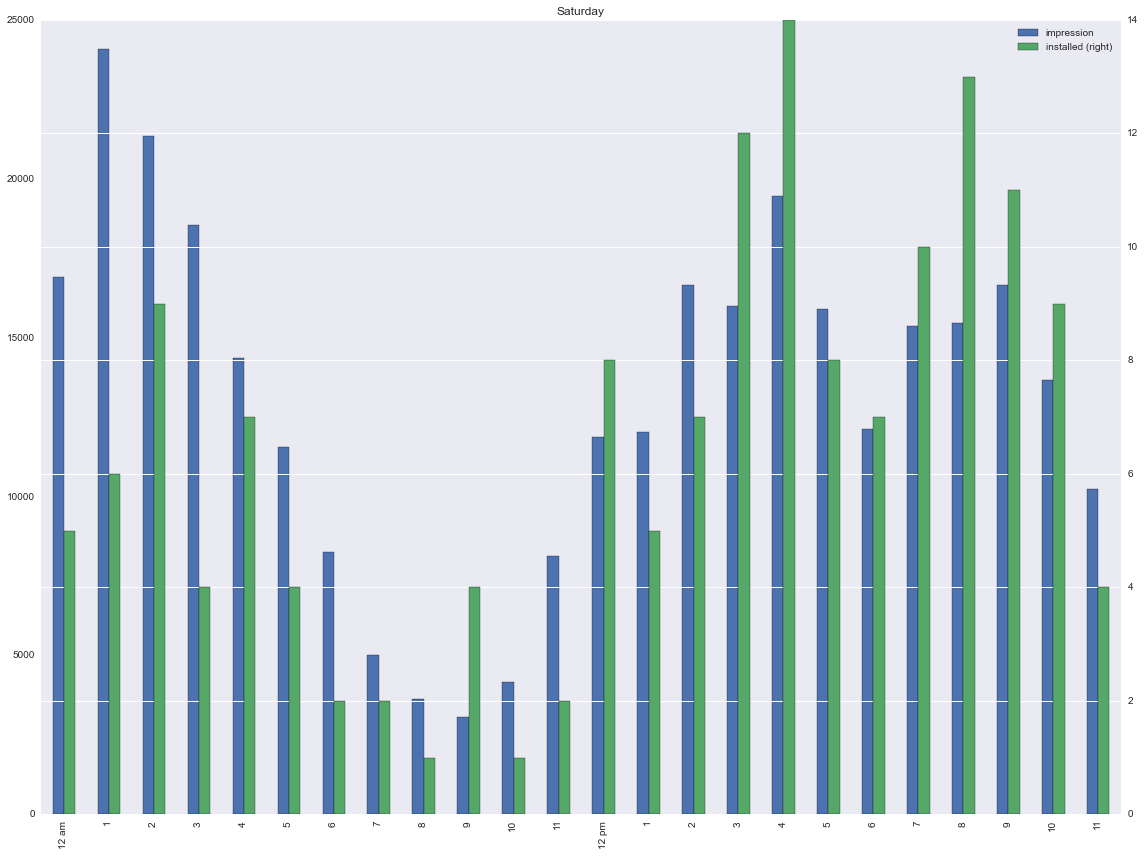

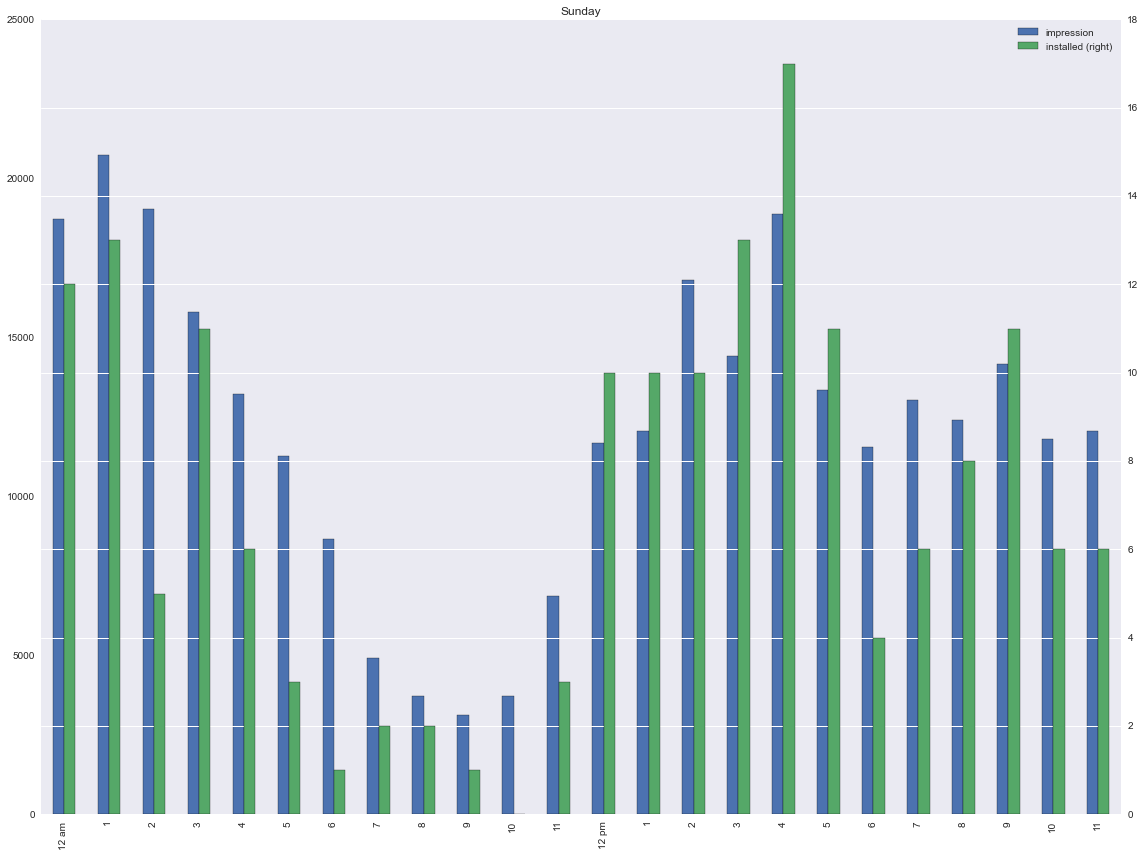

In [28]:
for i in range(1,8):
    plots= grouped_Imp_Ins_Daily[grouped_Imp_Ins_Daily['weekday']==i].drop(['weekday', 'hours'],1).plot(kind='bar', secondary_y='installed')
    plt.xticks(grouped_Imp_Ins_Daily['hours'], hours, rotation='vertical')
    plt.title(days[i-1])
    plt.tight_layout()
    plt.savefig('Impressions_Installs_Daily_'+str(days[i-1])+'.png', dpi=dpii)
    

In [29]:
grouped_Imp_Cli_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'clicked']].sum().reset_index()

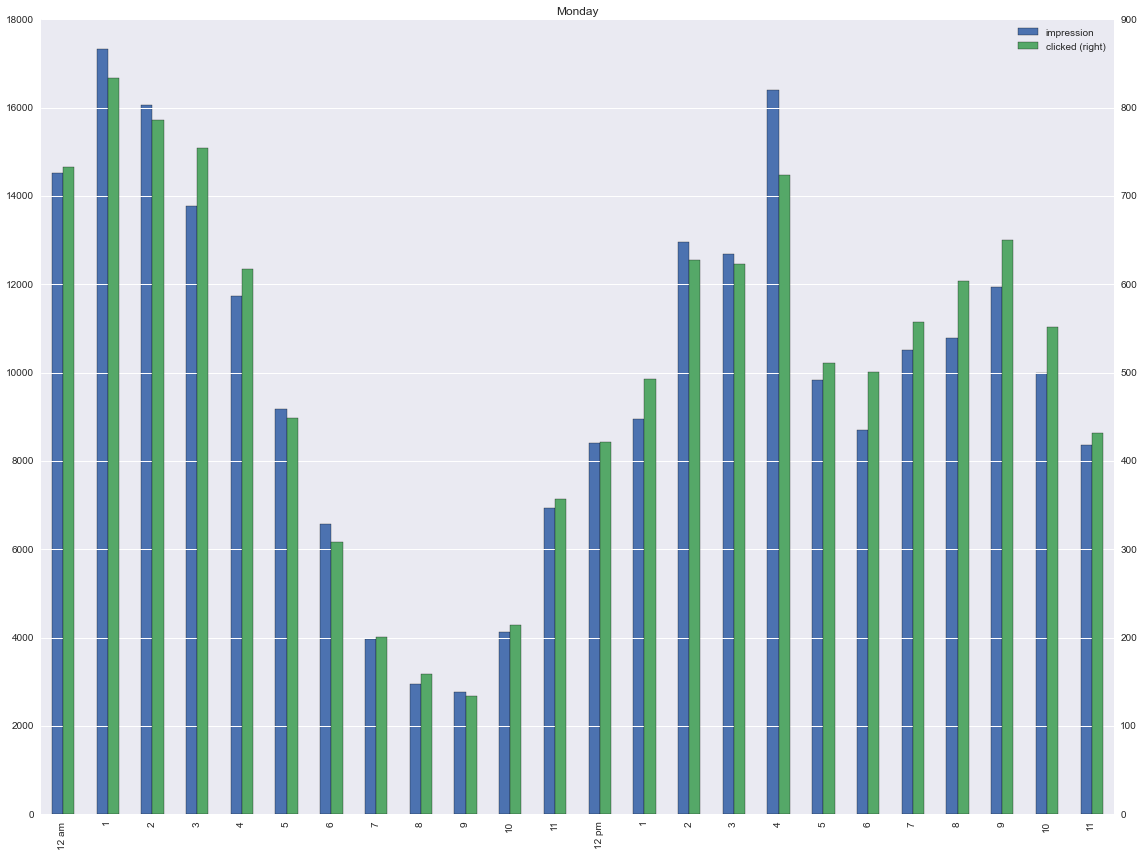

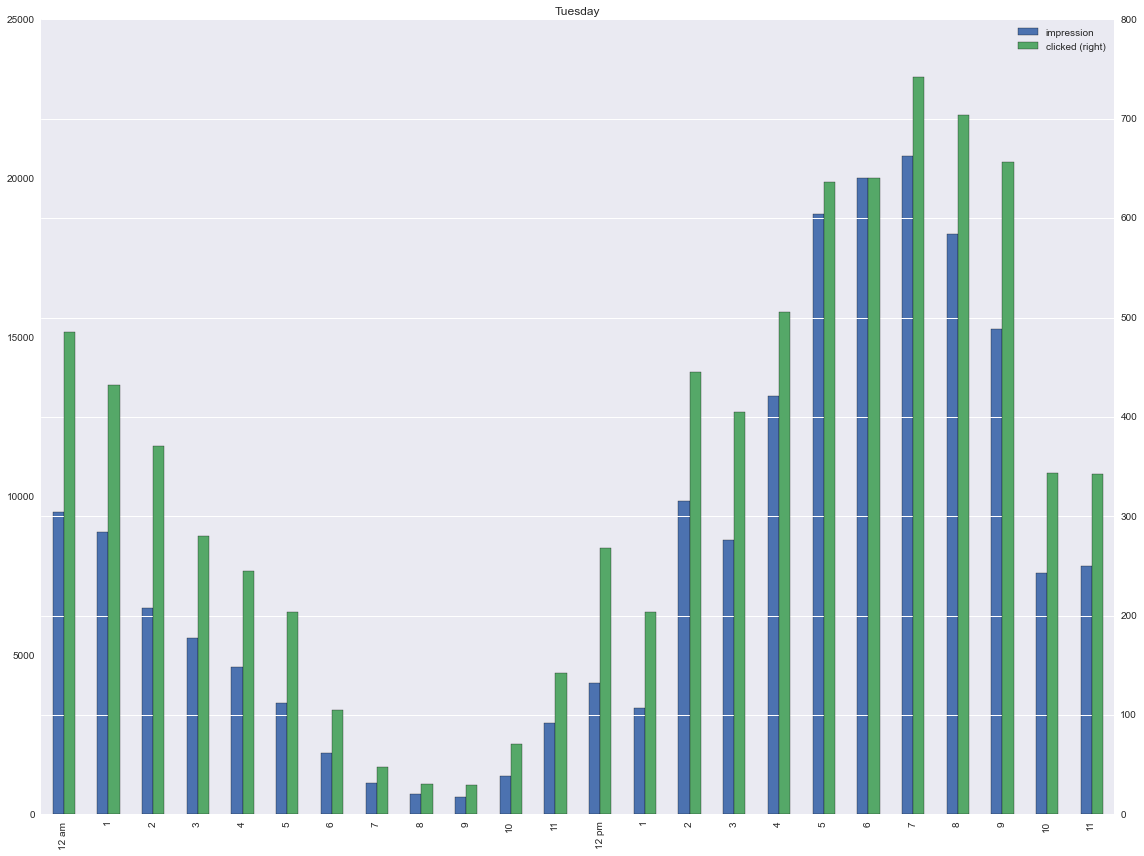

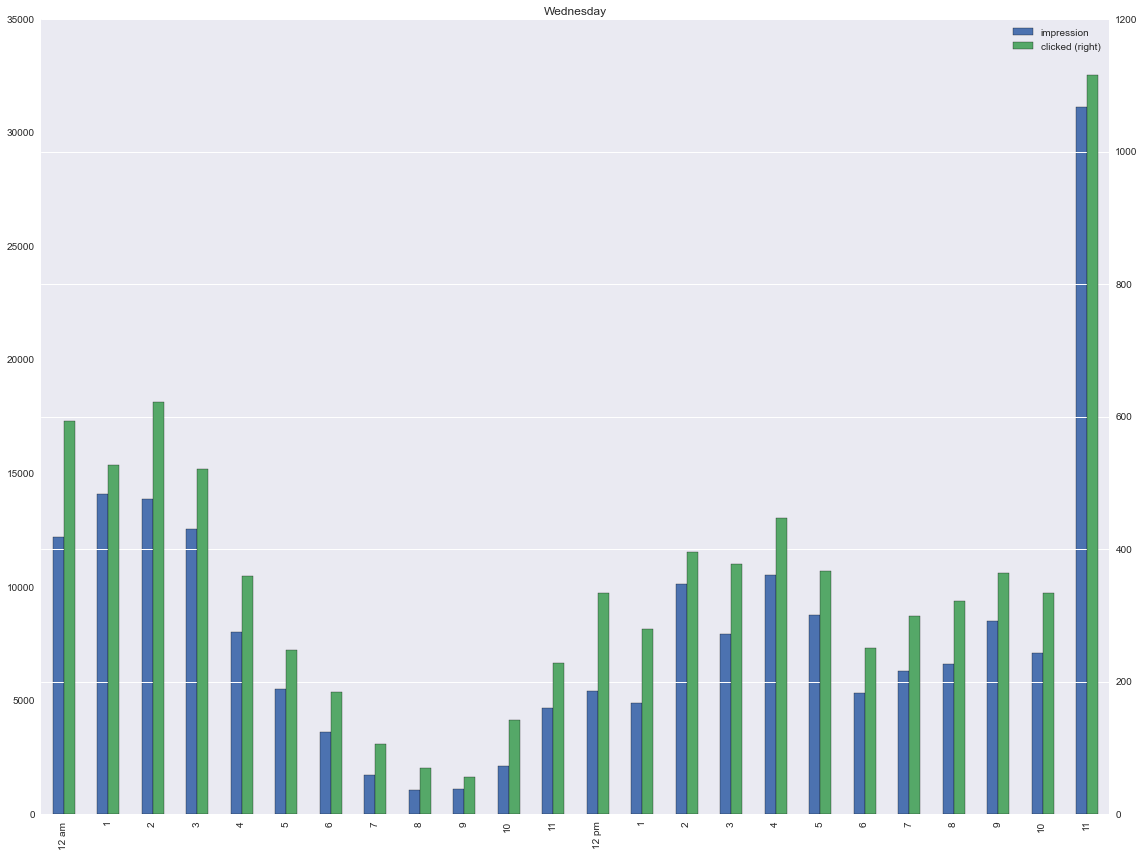

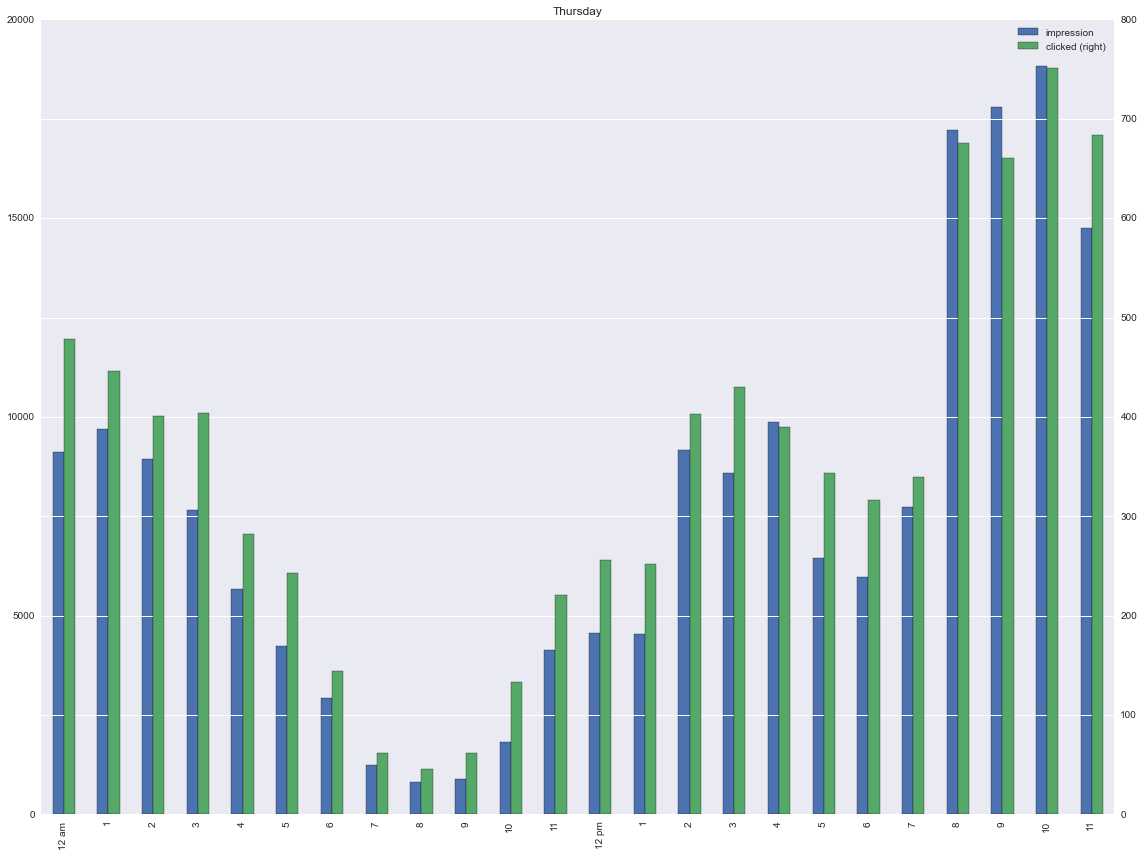

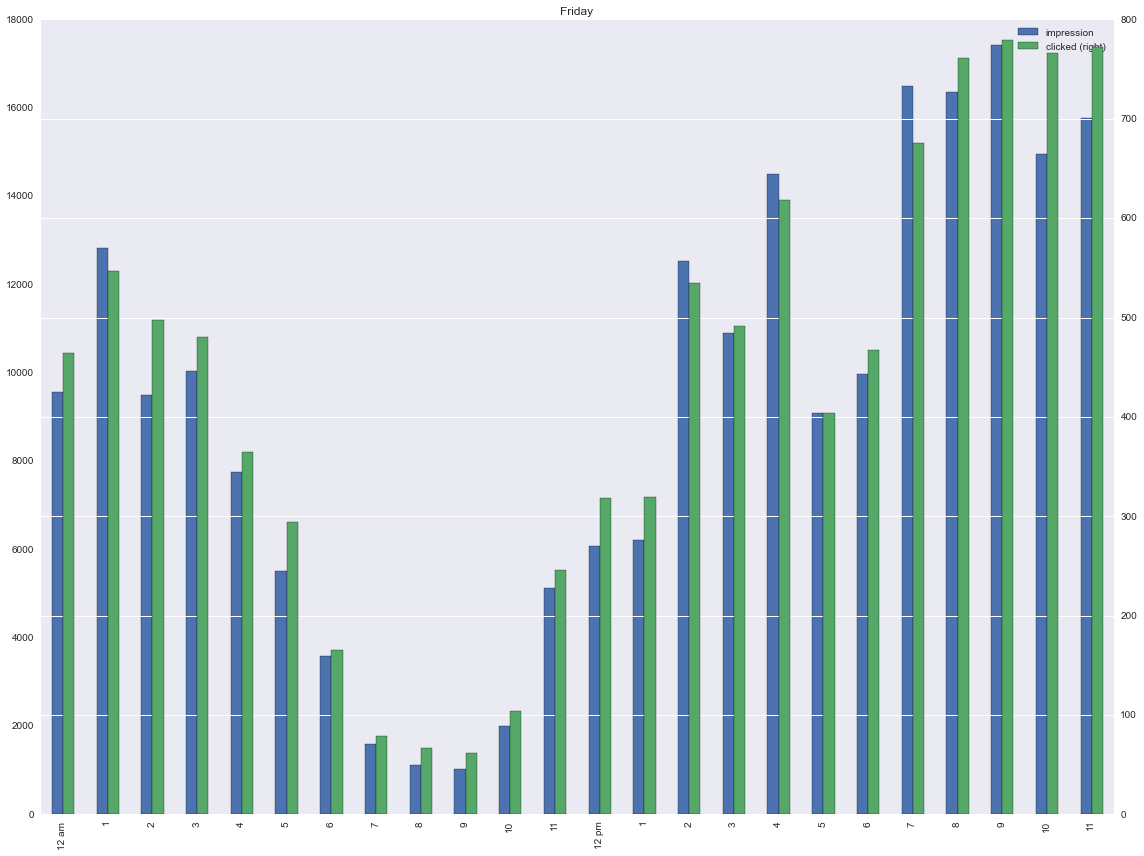

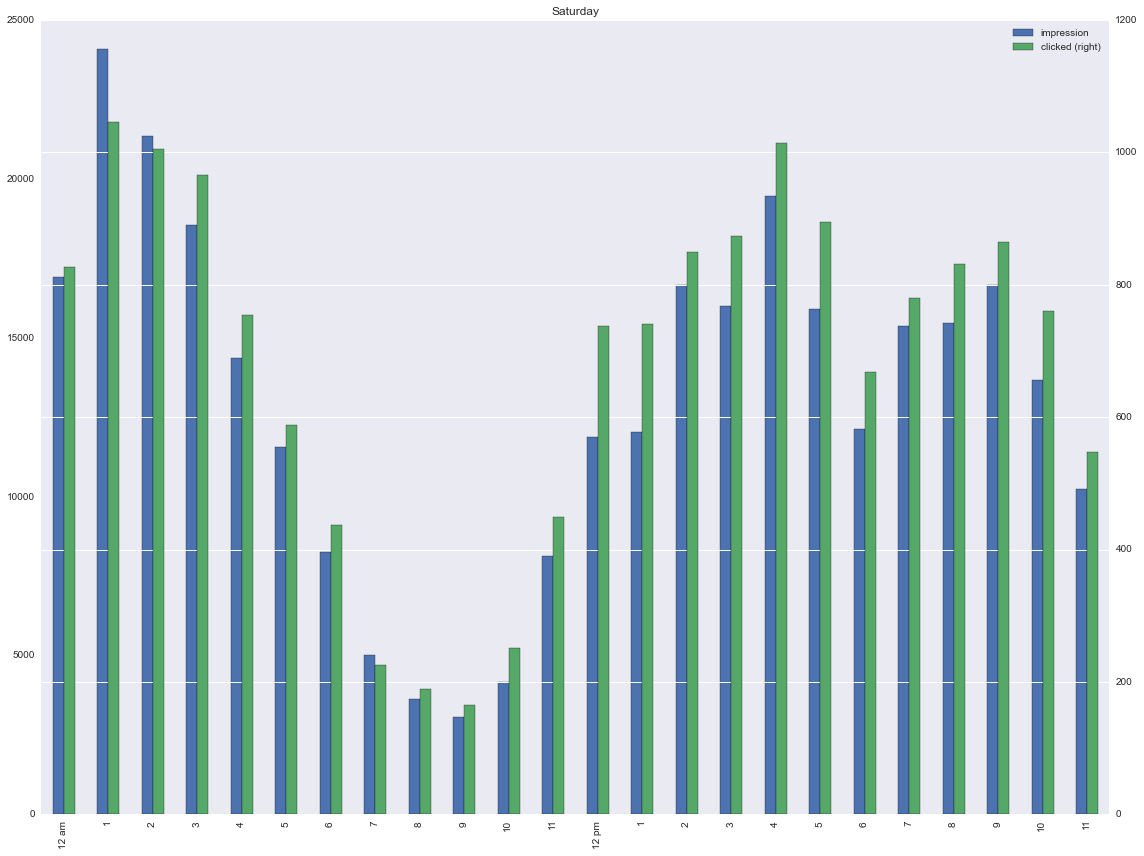

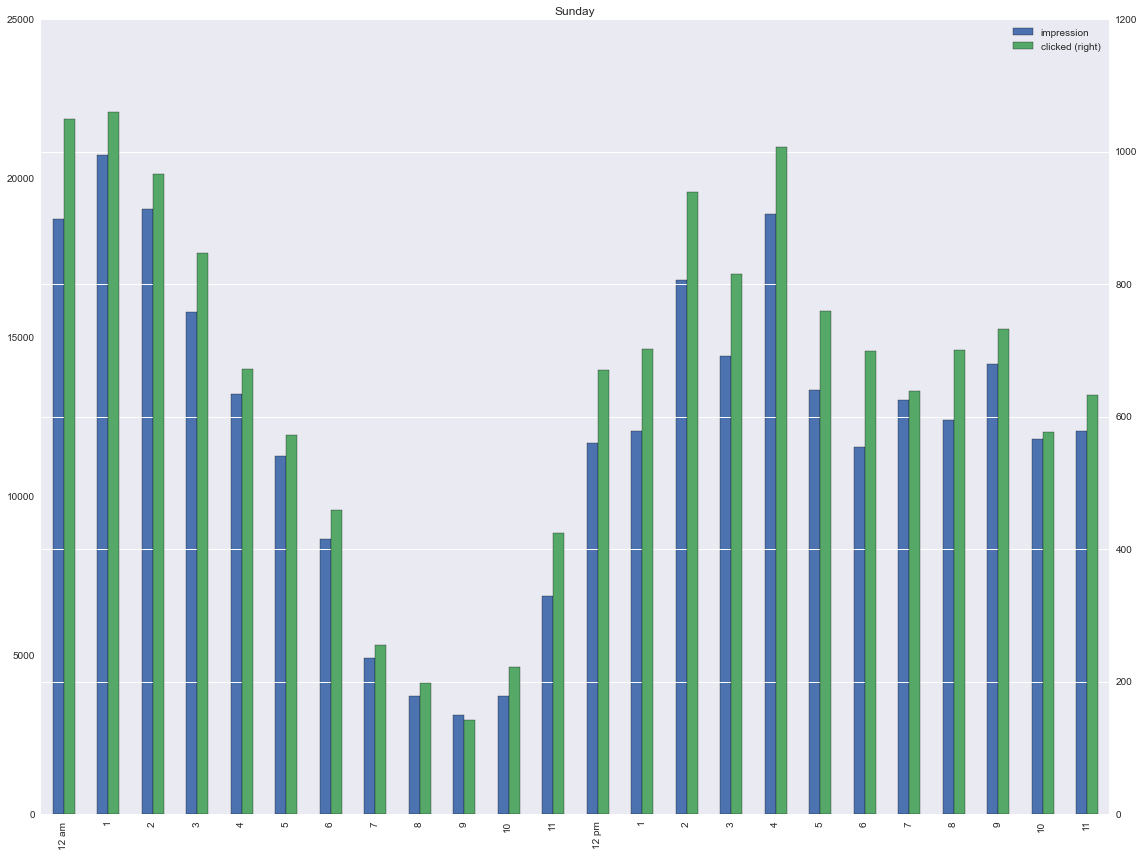

In [30]:
for i in range(1,8):
    plots= grouped_Imp_Cli_Daily[grouped_Imp_Cli_Daily['weekday']==i].drop(['weekday', 'hours'],1).plot(kind='bar', secondary_y='clicked')
    plt.xticks(grouped_Imp_Cli_Daily['hours'], hours, rotation='vertical')
    plt.title(days[i-1])
    plt.tight_layout()
    plt.savefig('Impressions_Installs_hourly_'+str(days[i-1])+'.png', dpi=dpii)
  

#### Categorical Inspection

In [31]:
grouped_cat_days=mini_df.groupby(['app_type', 'weekday'])[['impression', 'clicked', 'installed']].sum()

In [32]:
grouped_cat_days=grouped_cat_days.reset_index()

In [33]:
grouped_cat=mini_df.groupby(['app_type'])[['impression', 'clicked', 'installed']].sum()

In [34]:
app_type_index=grouped_cat_days['app_type'].unique()

In [35]:
grouped_cat['ratio']=grouped_cat['installed']/grouped_cat['impression']

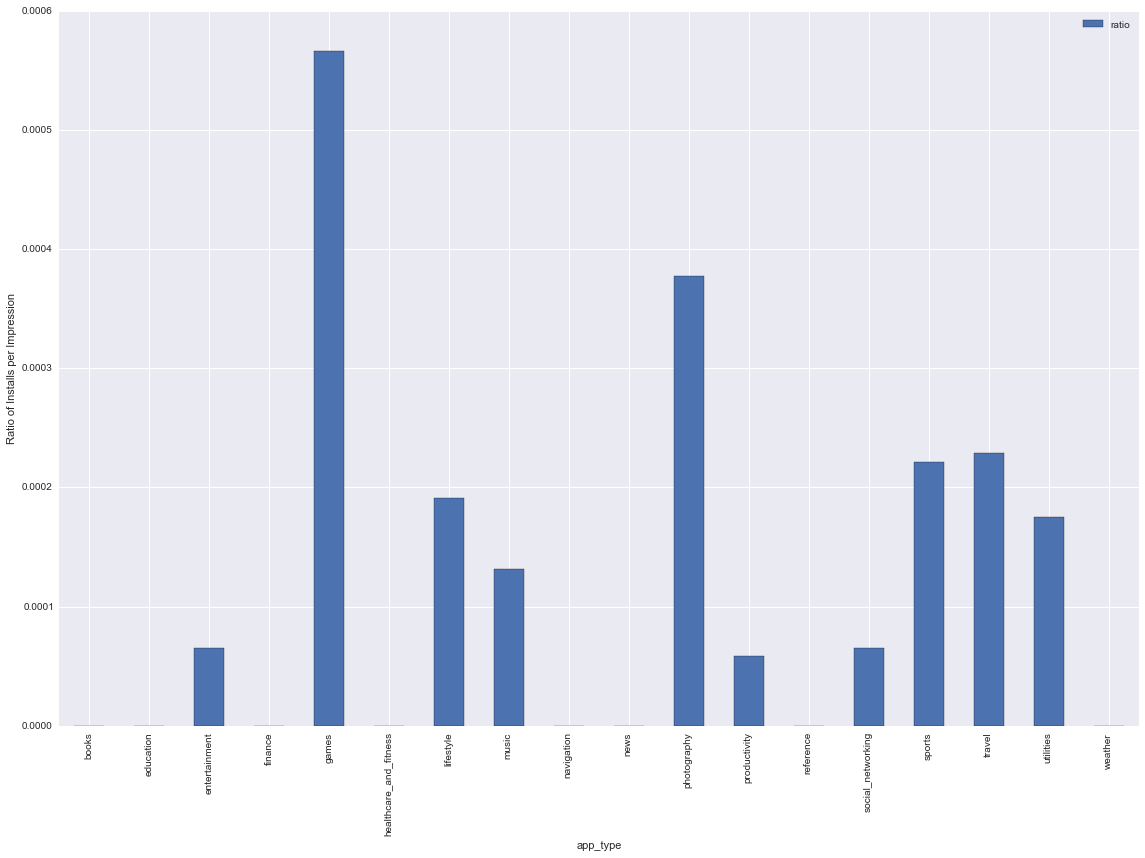

In [36]:
cat_plot = grouped_cat.drop(['clicked', 'installed', 'impression'],1).plot(kind='bar')
plt.xticks(range(0,len(app_type_index)), app_type_index, rotation='vertical');
plt.ylabel('Ratio of Installs per Impression');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Categorical_Feature_Exploration.png', dpi=dpii)

In [37]:
grouped_cat_days['ratio']=grouped_cat_days['clicked']/grouped_cat_days['impression']

In [38]:
grouped_cat_days.groupby('ratio').sum().reset_index();